# 신경망 모델 훈련

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/7-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 손실 곡선

In [3]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

# 입력, 타깃 쌍으로 구성
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data() 

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [4]:
# 모델 생성 함수

def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [6]:
model = model_fn()  # 추가로 은닉층 추가안함

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


#### fit() 메소드는 History 클래스 객체를 반환 - 손실과 정확도가 포함

In [4]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [5]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


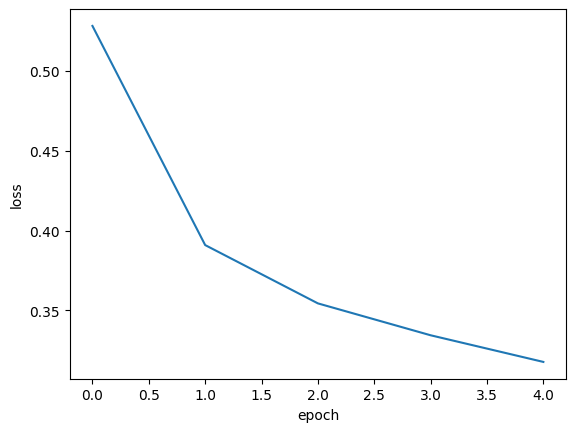

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.savefig('7_3-01', dpi=300)  # 이미지 파일로 저장
plt.show()

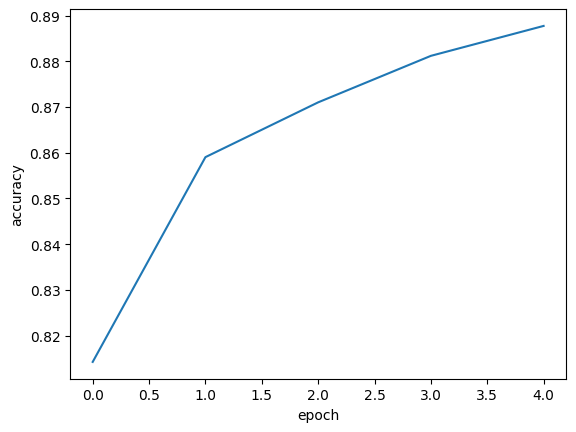

In [7]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.savefig('7_3-02', dpi=300)
plt.show()

에포크를 늘려서 다시!

In [8]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

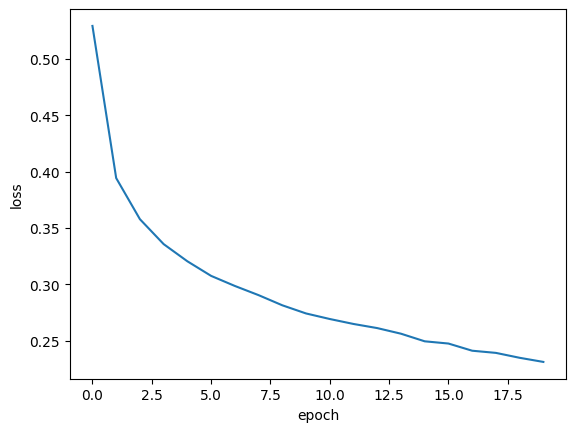

In [9]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.savefig('7_3-03', dpi=300)
plt.show()

## 검증 손실

In [10]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target))  # 검증에 사용할 입력과 타깃값을 튜플로 전달

In [11]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


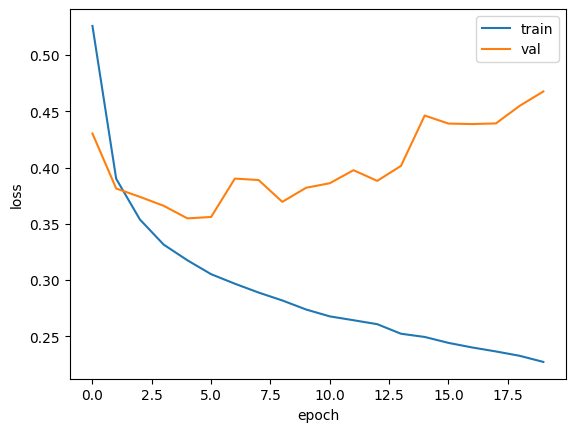

In [12]:
plt.plot(history.history['loss'])  # 훈련 손실
plt.plot(history.history['val_loss'])  # 검증 손실
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('7_3-04', dpi=300)
plt.show()

전형적인 과대적합 모델인 것을 알 수 있음

In [13]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target))

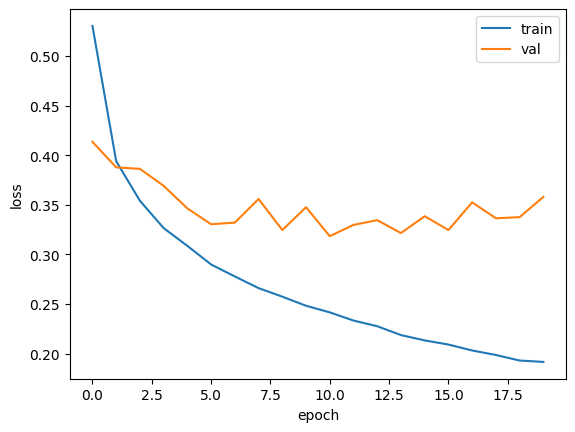

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('7_3-05', dpi=300)
plt.show()

과대적합이 조금 줄었다

## 드롭아웃

In [15]:
model = model_fn(keras.layers.Dropout(0.3))  # 30% 드롭아웃

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Dropout 층은 훈련되는 모델 파라미터가 없다

In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target))

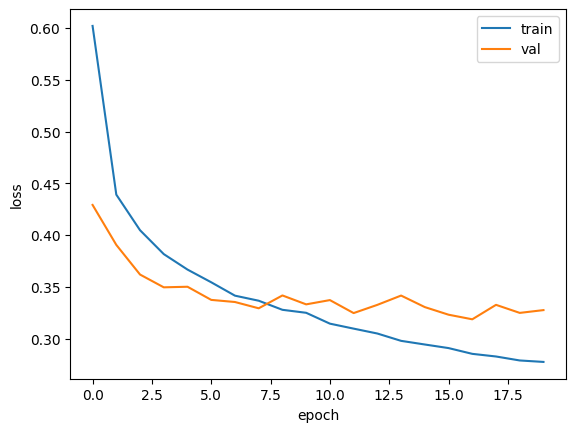

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('7_3-06', dpi=300)
plt.show()

확실히 과대적합이 줄었지만 20번의 에포크 동안 훈련을 해 결국엔 과대적합임 >> 에포크 횟수를 줄여야함

## 모델 저장과 복원

In [7]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=10, verbose=0, 
                    validation_data=(val_scaled, val_target))

#### 훈련된 모델 파라미터 저장

In [9]:
model.save_weights('model-weights.h5') 

#### 모델 구조와 모델 파라미터를 함께 저장

In [10]:
model.save('model-whole.h5')

In [11]:
!ls -al *.h5  # 파일이 잘 만들어졌는지 확인

-rw-r--r--@ 1 Ahn  staff  982480  6  5 17:08 best-model.h5
-rw-r--r--@ 1 Ahn  staff  333144  6 13 00:04 model-weights.h5
-rw-r--r--@ 1 Ahn  staff  982384  6 13 00:04 model-whole.h5


#### 1) 훈련하지 않은 새 모델을 만들고 model-weights.h5 파일에서 훈련된 모델 파라미터를 읽어서 사용하기

In [12]:
model = model_fn(keras.layers.Dropout(0.3))

model.load_weights('model-weights.h5')

In [13]:
import numpy as np

val_labels = np.argmax(model.predict(val_scaled), axis=-1)  # 배열에서 가장 큰 값의 인덱스 반환. 배열의 마지막 차원을 따라 최대값 고름
print(np.mean(val_labels == val_target))  # 값이 같으면 1, 다르면 0

375/375 [==============================] - 0s 410us/step
0.8808333333333334


#### 2) 모델 전체를 파일에서 읽어와 검증 세트의 정확도 출력하기

In [14]:
model = keras.models.load_model('model-whole.h5')
# 텐서플로 2.3에서는 버그(https://github.com/tensorflow/tensorflow/issues/42890) 때문에 compile() 메서드를 호출해야 합니다.
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 464us/step - loss: 0.3260 - accuracy: 0.8808


[0.32600829005241394, 0.8808333277702332]

같은 모델을 저장하고 불러왔기 때문에 동일한 정확도

## 콜백

In [27]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')

model.fit(train_scaled, train_target, epochs=20, verbose=0, 
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])  # 에포크마다 모델 저장

In [28]:
model = keras.models.load_model('best-model.h5')
# 텐서플로 2.3에서는 버그(https://github.com/tensorflow/tensorflow/issues/42890) 때문에 compile() 메서드를 호출해야 합니다.
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 306us/step - loss: 0.3325 - accuracy: 0.8842


[0.3325313627719879, 0.8841666579246521]

#### 조기 종료 

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,   # 2번 연속 검증 점수가 향상되지 않으면 조기종료
                                                  restore_best_weights=True)  # 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌림

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])  # 에포크마다 모델 저장

In [31]:
print(early_stopping_cb.stopped_epoch)

13


열네번째 에포크에서 중지됨

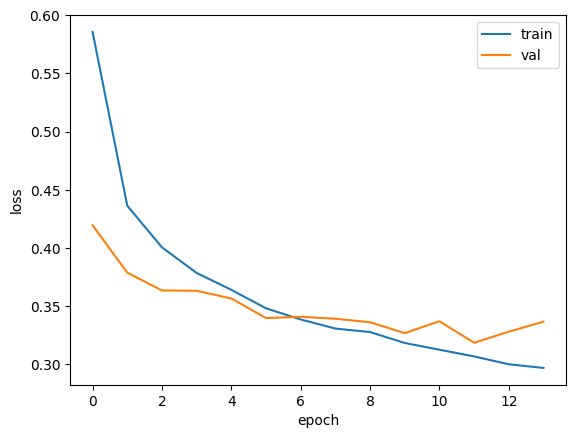

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('7_3-07', dpi=300)
plt.show()

In [33]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 351us/step - loss: 0.3185 - accuracy: 0.8842


[0.3185162842273712, 0.8842499852180481]